In [1]:
import numpy as np
import pandas as pd
import datetime
from tqdm import tqdm, tqdm_notebook
from datetime import timedelta

In [2]:
data1 = pd.read_csv('./raw/jellyfish_busan_20170301_20220630.csv', encoding='utf-8-sig')
data2 = pd.read_csv('./raw/merged_busan_processed.csv', encoding = 'utf-8-sig')
data3 = pd.read_csv('./raw/[k-water]precipitation_final.csv',encoding='utf-8-sig')
data2 = data2.iloc[:,1:]
data3.rename(columns={'부산광역시 부산광역시':'precipitation_busan'},inplace=True)

In [3]:
data1['date'] = data1['date'].astype(str)
data1['date'] = pd.to_datetime(data1['date'])
data1['date'] = data1['date'].dt.tz_localize('UTC')
data1['date'] = pd.to_datetime(data1['date']).dt.date

data2['date'] = pd.to_datetime(data2['date']).dt.date

data3['date'] = data3['date'].astype(str)
data3['date'] = pd.to_datetime(data3['date'])
data3['date'] = data3['date'].dt.tz_localize('UTC')
data3['date'] = pd.to_datetime(data3['date']).dt.date

In [4]:
data1.set_index('date',inplace=True)
data2.set_index('date',inplace=True)
data3.set_index('date',inplace=True)
data1.sort_index(inplace=True)
data3.sort_index(inplace=True)
data3 = data3.iloc[:,1]
data3 = pd.DataFrame(data3)
display(data1)
display(data2)
display(data3)

,sea,htype,percent,freq
date,,,,
2017-05-11,부산 가덕도,보름달물해파리_약독성,11.54,1
2017-05-11,부산 고리원전,보름달물해파리_약독성,11.54,1
2017-05-18,부산 생도,보름달물해파리_약독성,11.54,2
2017-05-25,부산 고리원전,보름달물해파리_약독성,11.54,1
2017-05-25,부산 광안리,보름달물해파리_약독성,11.54,1
...,...,...,...,...
2022-06-30,부산 광안리,보름달물해파리_약독성,35.70,1
2022-06-30,부산 영도,보름달물해파리_약독성,35.70,1
2022-06-30,부산 가덕도,보름달물해파리_약독성,35.70,1


,water temperature,salt,temperature,air press,wind direction,wind speed,max wind
date,,,,,,,
2017-06-01,16.50,33.87,19.43,1001.40,2,2.58,3.33
2017-06-01,16.50,33.87,19.70,1001.14,1,1.99,2.55
2017-06-01,16.46,33.89,19.64,1000.68,2,2.73,3.48
2017-06-01,16.40,33.96,19.55,1000.35,1,2.24,2.92
2017-06-01,16.40,34.09,19.13,1000.55,3,1.77,2.42
...,...,...,...,...,...,...,...
2022-04-30,14.58,33.06,14.23,1013.97,2,1.55,2.27
2022-04-30,14.56,33.09,14.27,1014.26,2,1.77,2.59
2022-04-30,14.54,33.15,14.14,1014.48,0,1.74,2.47


,precipitation_busan
date,
2017-06-01,231.510614
2017-06-08,231.510614
2017-06-15,231.510614
2017-06-22,231.510614
2017-06-29,231.510614
...,...
2022-06-02,392.300000
2022-06-09,392.300000
2022-06-16,392.300000


In [5]:
date_lst = data2.index.unique()
df = pd.DataFrame()
for element in tqdm(date_lst[:]):
    tmp_df = data2[data2.index==element].mean(axis='rows')
    df = df.append(tmp_df, ignore_index=True)
df['date'] = date_lst
df.set_index('date',inplace=True)
display(df)

  0%|          | 0/1795 [00:00<?, ?it/s]C:\Users\ksjsc\AppData\Local\Temp\ipykernel_15824\3174013889.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp_df, ignore_index=True)
C:\Users\ksjsc\AppData\Local\Temp\ipykernel_15824\3174013889.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp_df, ignore_index=True)
C:\Users\ksjsc\AppData\Local\Temp\ipykernel_15824\3174013889.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp_df, ignore_index=True)
C:\Users\ksjsc\AppData\Local\Temp\ipykernel_15824\3174013889.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp_df, ign

,water temperature,salt,temperature,air press,wind direction,wind speed,max wind
date,,,,,,,
2017-06-01,16.695833,34.055833,19.675417,998.926667,5.875000,3.244167,4.450417
2017-06-02,16.806250,34.115000,17.545833,1003.774583,7.625000,2.270417,3.670833
2017-06-03,17.222500,34.048333,18.708333,1007.106250,8.000000,2.653750,3.896250
2017-06-04,17.207917,34.064167,19.384583,1010.779583,7.291667,2.025417,3.090417
2017-06-05,17.432917,34.055417,19.178333,1015.274583,10.958333,2.400833,4.097917
...,...,...,...,...,...,...,...
2022-04-26,15.027083,33.050417,17.586250,1002.100833,5.750000,1.812500,2.690417
2022-04-27,14.909583,32.613750,17.559167,1012.372917,9.833333,1.880000,3.837917
2022-04-28,14.669583,32.880417,16.247917,1016.160417,10.166667,2.271667,4.584167


In [6]:
df2 = pd.DataFrame()
day = datetime.date(2017, 6, 2)
while(day < datetime.date(2022, 4, 30)):
    tmp_df = df[(df.index >= day) & (df.index <= day + datetime.timedelta(days=6))].mean(axis='rows') 
    day += datetime.timedelta(days=6)
    tmp_df['date'] = day
    df2 = df2.append(tmp_df, ignore_index=True)
    day += datetime.timedelta(days=1)
df2.set_index('date',inplace=True)
display(df2)

C:\Users\ksjsc\AppData\Local\Temp\ipykernel_15824\3747984747.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(tmp_df, ignore_index=True)
C:\Users\ksjsc\AppData\Local\Temp\ipykernel_15824\3747984747.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(tmp_df, ignore_index=True)
C:\Users\ksjsc\AppData\Local\Temp\ipykernel_15824\3747984747.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(tmp_df, ignore_index=True)
C:\Users\ksjsc\AppData\Local\Temp\ipykernel_15824\3747984747.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(tmp_df, ignore_index=True)
C:\Users\ksjsc\A

,water temperature,salt,temperature,air press,wind direction,wind speed,max wind
date,,,,,,,
2017-06-08,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917
2017-06-15,17.606488,33.873929,19.889048,1010.079405,7.922619,3.063690,4.624464
2017-06-22,19.106667,33.725595,20.474821,1008.802560,6.160714,2.543333,3.787024
2017-06-29,18.935417,33.739821,21.841607,1007.747321,7.172619,1.788393,2.752917
2017-07-06,19.513333,33.013674,23.092976,1008.923036,3.523810,2.909881,3.988988
...,...,...,...,...,...,...,...
2022-04-07,13.238393,33.920714,12.596964,1023.047619,6.065476,1.885060,2.933750
2022-04-14,13.963929,33.854464,15.671488,1015.260952,6.113095,2.889286,4.603810
2022-04-21,14.010536,33.712083,15.228690,1015.569643,7.309524,1.806786,2.870714


In [7]:
final = data1.join(df2).dropna(axis=0)
final = final.join(data3).dropna(axis=0)
label_column = final['freq']
final.reset_index(inplace=True)
display(final)

,date,sea,htype,percent,freq,water temperature,salt,temperature,air press,wind direction,wind speed,max wind,precipitation_busan
0,2017-06-08,부산 오륙도,노무라입깃해파리_강독성,0.59,0,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614
1,2017-06-08,부산 해운대,보름달물해파리_약독성,24.00,1,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614
2,2017-06-08,부산 동백리,보름달물해파리_약독성,24.00,1,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614
3,2017-06-08,부산 동백리 생도,보름달물해파리_약독성,24.00,1,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614
4,2017-06-08,부산 동백리 가덕도,보름달물해파리_약독성,24.00,1,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614
...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,2021-11-25,부산 암남동,노무라입깃해파리_강독성,3.00,1,15.512857,32.908452,12.574583,1016.171726,8.386905,2.289167,3.541012,1822.800000
814,2021-11-25,부산 대변항,노무라입깃해파리_강독성,3.00,1,15.512857,32.908452,12.574583,1016.171726,8.386905,2.289167,3.541012,1822.800000
815,2021-12-02,부산 청사포,노무라입깃해파리_강독성,3.10,1,14.384981,33.086647,9.335919,1022.817887,9.231138,2.134277,3.335022,1822.800000
816,2021-12-02,부산 암남동,유령해파리_강독성,1.40,1,14.384981,33.086647,9.335919,1022.817887,9.231138,2.134277,3.335022,1822.800000


In [8]:
del final['freq']
final['freq'] = label_column.to_list()
final.to_csv('./data/jellyfish1.csv', encoding='utf-8-sig', index=False)
display(final)

,date,sea,htype,percent,water temperature,salt,temperature,air press,wind direction,wind speed,max wind,precipitation_busan,freq
0,2017-06-08,부산 오륙도,노무라입깃해파리_강독성,0.59,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614,0
1,2017-06-08,부산 해운대,보름달물해파리_약독성,24.00,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614,1
2,2017-06-08,부산 동백리,보름달물해파리_약독성,24.00,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614,1
3,2017-06-08,부산 동백리 생도,보름달물해파리_약독성,24.00,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614,1
4,2017-06-08,부산 동백리 가덕도,보름달물해파리_약독성,24.00,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,2021-11-25,부산 암남동,노무라입깃해파리_강독성,3.00,15.512857,32.908452,12.574583,1016.171726,8.386905,2.289167,3.541012,1822.800000,1
814,2021-11-25,부산 대변항,노무라입깃해파리_강독성,3.00,15.512857,32.908452,12.574583,1016.171726,8.386905,2.289167,3.541012,1822.800000,1
815,2021-12-02,부산 청사포,노무라입깃해파리_강독성,3.10,14.384981,33.086647,9.335919,1022.817887,9.231138,2.134277,3.335022,1822.800000,1
816,2021-12-02,부산 암남동,유령해파리_강독성,1.40,14.384981,33.086647,9.335919,1022.817887,9.231138,2.134277,3.335022,1822.800000,1


------

In [9]:
import numpy as np
import pandas as pd
import random

In [10]:
data = pd.read_csv('./data/jellyfish1.csv', encoding='utf-8-sig')
display(data)

,date,sea,htype,percent,water temperature,salt,temperature,air press,wind direction,wind speed,max wind,precipitation_busan,freq
0,2017-06-08,부산 오륙도,노무라입깃해파리_강독성,0.59,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614,0
1,2017-06-08,부산 해운대,보름달물해파리_약독성,24.00,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614,1
2,2017-06-08,부산 동백리,보름달물해파리_약독성,24.00,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614,1
3,2017-06-08,부산 동백리 생도,보름달물해파리_약독성,24.00,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614,1
4,2017-06-08,부산 동백리 가덕도,보름달물해파리_약독성,24.00,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,2021-11-25,부산 암남동,노무라입깃해파리_강독성,3.00,15.512857,32.908452,12.574583,1016.171726,8.386905,2.289167,3.541012,1822.800000,1
814,2021-11-25,부산 대변항,노무라입깃해파리_강독성,3.00,15.512857,32.908452,12.574583,1016.171726,8.386905,2.289167,3.541012,1822.800000,1
815,2021-12-02,부산 청사포,노무라입깃해파리_강독성,3.10,14.384981,33.086647,9.335919,1022.817887,9.231138,2.134277,3.335022,1822.800000,1
816,2021-12-02,부산 암남동,유령해파리_강독성,1.40,14.384981,33.086647,9.335919,1022.817887,9.231138,2.134277,3.335022,1822.800000,1


In [11]:
data.freq.unique()

array([0, 1, 2], dtype=int64)

In [12]:
total_len = len(data)
freq0 = data[data.freq==0]
freq1 = data[data.freq==1]
freq2 = data[(data.freq==0)|(data.freq==2)]
print(len(freq0), len(freq1), len(freq2), total_len)

23 536 282 818


In [13]:
r_1 = len(freq1) / total_len
r_2 = len(freq2) / total_len
print(f"r_1:{r_1}, r_2:{r_2}")

r_1:0.6552567237163814, r_2:0.34474327628361856


In [14]:
N = 15
T_1 = round(N * r_1)
T_2 = round(N * r_2)
print(T_1, T_2)

10 5


In [16]:
argumented_data = pd.DataFrame()
for i in tqdm(range(6000)):
    data_piece1 = freq1.sample(n=T_1, replace=True)
    data_piece2 = freq2.sample(n=T_2, replace=True)
    data_piece = pd.concat([data_piece1, data_piece2])
    argumented_data = argumented_data.append(data_piece)
argumented_data = argumented_data.iloc[:,1:]
argumented_data.reset_index(drop=True,inplace=True)
display(argumented_data)

  0%|          | 0/6000 [00:00<?, ?it/s]C:\Users\ksjsc\AppData\Local\Temp\ipykernel_15824\621276511.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  argumented_data = argumented_data.append(data_piece)
C:\Users\ksjsc\AppData\Local\Temp\ipykernel_15824\621276511.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  argumented_data = argumented_data.append(data_piece)
C:\Users\ksjsc\AppData\Local\Temp\ipykernel_15824\621276511.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  argumented_data = argumented_data.append(data_piece)
C:\Users\ksjsc\AppData\Local\Temp\ipykernel_15824\621276511.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

,sea,htype,percent,water temperature,salt,temperature,air press,wind direction,wind speed,max wind,precipitation_busan,freq
0,부산 송정,노무라입깃해파리_강독성,52.70,27.414167,30.596845,28.681845,1003.537976,3.071429,2.055298,2.926667,1822.800000,1
1,부산 광안리,유령해파리_강독성,6.88,26.543155,32.365000,26.767560,1008.145476,9.267857,2.622917,4.494107,514.781985,1
2,부산 목도,노무라입깃해파리_강독성,15.61,23.575060,31.549702,22.867024,1011.306131,9.428571,3.201488,5.028810,406.892363,1
3,부산 가덕도,노무라입깃해파리_강독성,0.80,16.784167,32.479464,19.280774,1006.508631,6.035714,2.357917,3.461845,1822.800000,1
4,부산 목도,야광원양해파리_강독성,0.45,17.193810,33.696659,20.450833,1012.011250,4.636905,2.983393,4.132679,60.700000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
89995,부산 생도,노무라입깃해파리_강독성,22.92,22.330655,29.163095,24.781131,1006.784107,3.261905,3.759643,5.332381,60.700000,2
89996,부산 영도,노무라입깃해파리_강독성,49.50,25.388452,29.418929,25.985655,1007.949821,4.184524,2.773274,4.186905,1822.800000,2
89997,부산 오륙도,유령해파리_강독성,3.75,24.692381,31.855298,26.105238,1008.018631,10.005952,2.172143,3.560060,406.892363,0
89998,부산 송정,노무라입깃해파리_강독성,47.70,25.165774,30.570000,27.689940,1012.175476,7.464286,1.817500,3.384702,1822.800000,2


In [17]:
data_mean = data.mean(axis='rows')
data_median = data.median(axis='rows')
data_std = data.std(axis='rows')

argumented_data_mean = argumented_data.mean(axis='rows')
argumented_data_median = argumented_data.median(axis='rows')
argumented_data_std = argumented_data.std(axis='rows')

C:\Users\ksjsc\AppData\Local\Temp\ipykernel_15824\3087668532.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_mean = data.mean(axis='rows')
C:\Users\ksjsc\AppData\Local\Temp\ipykernel_15824\3087668532.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_median = data.median(axis='rows')
C:\Users\ksjsc\AppData\Local\Temp\ipykernel_15824\3087668532.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_std = data.std(axis='rows')
C:\Users\ksjsc\AppData\Local\Temp\ipykernel_

In [70]:
data_df = pd.DataFrame()
data_df['original_mean'] = data_mean
data_df['argumented_mean'] = argumented_data_mean
data_df['original_median'] = data_median
data_df['argumented_median'] = argumented_data_median
data_df['original_std'] = data_std
data_df['argumented_std'] = argumented_data_std
data_df = data_df.T
data_df.index.name = 'statistics'
display(data_df)

,percent,water temperature,salt,temperature,air press,wind direction,wind speed,max wind,precipitation_busan,freq
statistics,,,,,,,,,,
original_mean,23.031601,22.009734,31.570659,23.367802,1009.863534,7.441326,2.348672,3.630562,919.339343,1.288509
argumented_mean,22.982131,22.001203,31.574563,23.351214,1009.867414,7.444139,2.352768,3.636920,918.178774,1.279022
original_median,21.100000,22.006369,31.766071,23.566250,1008.923036,7.440476,2.245060,3.538452,688.800000,1.000000
argumented_median,21.100000,21.980119,31.766071,23.566250,1009.023452,7.440476,2.259821,3.538452,688.800000,1.000000
original_std,16.796579,3.344241,1.575620,3.858572,4.383600,2.539092,0.502031,0.648610,689.762210,0.511690
argumented_std,16.713427,3.346088,1.573257,3.856502,4.383612,2.543581,0.503024,0.650024,689.045485,0.505453


In [71]:
argumented_data.to_csv('./data/argumented_jellyfish.csv', encoding='utf-8-sig', index=False)
data_df.to_csv('./original_vs_argumented_statistics.csv', encoding='utf-8-sig')

### Orignial vs Agumented Data Statistics Bar Chart

In [73]:
import pandas as pd
data_df = pd.read_csv('original_vs_argumented_statistics.csv',index_col='statistics')
display(data_df)

,percent,water temperature,salt,temperature,air press,wind direction,wind speed,max wind,precipitation_busan,freq
statistics,,,,,,,,,,
original_mean,23.031601,22.009734,31.570659,23.367802,1009.863534,7.441326,2.348672,3.630562,919.339343,1.288509
argumented_mean,22.982131,22.001203,31.574563,23.351214,1009.867414,7.444139,2.352768,3.636920,918.178774,1.279022
original_median,21.100000,22.006369,31.766071,23.566250,1008.923036,7.440476,2.245060,3.538452,688.800000,1.000000
argumented_median,21.100000,21.980119,31.766071,23.566250,1009.023452,7.440476,2.259821,3.538452,688.800000,1.000000
original_std,16.796579,3.344241,1.575620,3.858572,4.383600,2.539092,0.502031,0.648610,689.762210,0.511690
argumented_std,16.713427,3.346088,1.573257,3.856502,4.383612,2.543581,0.503024,0.650024,689.045485,0.505453


In [74]:
display(data_df.columns)

Index(['percent', 'water temperature', 'salt', 'temperature', 'air press',
       'wind direction', 'wind speed', 'max wind', 'precipitation_busan',
       'freq'],
      dtype='object')

In [75]:
df.original_mean

23.03160146699266

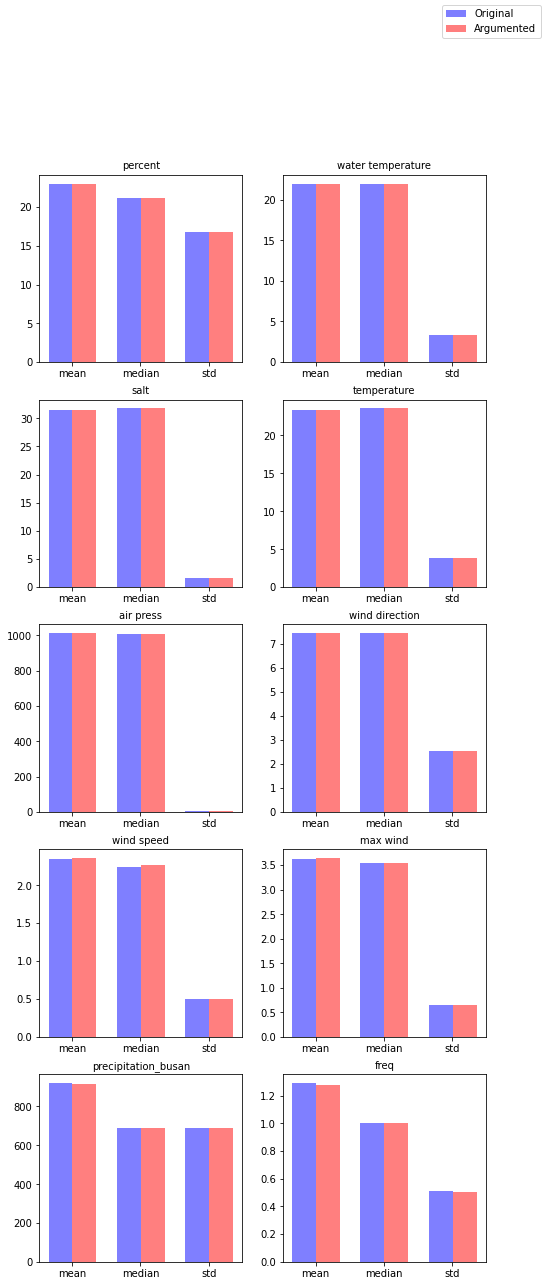

In [79]:
import matplotlib.pyplot as plt
import numpy as np

col_list = data_df.columns.tolist()


fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 20))

for row in range(5):
    for col in range(2):
        idx = row * 2 + col
        
        if idx < len(col_list):
            ax = axes[row][col]
            col = col_list[idx]
            
            
            df = data_df[col]
            original = [df.values[df.index=='original_mean'][0], df.values[df.index=='original_median'][0], df.values[df.index=='original_std']]
            argumented = [df.values[df.index=='argumented_mean'][0], df.values[df.index=='argumented_median'][0], df.values[df.index=='argumented_std'][0]]

            
            index = np.arange(3)
            x_label = ['mean', 'median', 'std']

            bar_width = 0.35
            alpha = 0.5

            p1 = ax.bar(index, original,
                         bar_width, 
                         color='b', 
                         alpha=alpha, 
                         label='Original')

            p2 = ax.bar(index + bar_width, argumented, 
                         bar_width,
                         color='r',
                         alpha=alpha,
                         label='Argumented')


            ax.set_title(col, fontsize=10)
            ax.set_xticks([0.17, 1.17, 2.17])
            ax.set_xticklabels(x_label)
            
fig.legend((p1[0], p2[0]), ('Original', 'Argumented'), loc = 'upper right')

plt.savefig('./image/original_vs_argumented_statistics.png', facecolor='#eeeeee')            
plt.show()